In [28]:
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [29]:
(train_images, train_labels), _ = mnist.load_data()

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
train_images = train_images.reshape((60000, 28*28)).astype("float32")
train_images = train_images / 255

In [32]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis = 1)

In [33]:
train_images_with_noise_channels.shape

(60000, 1568)

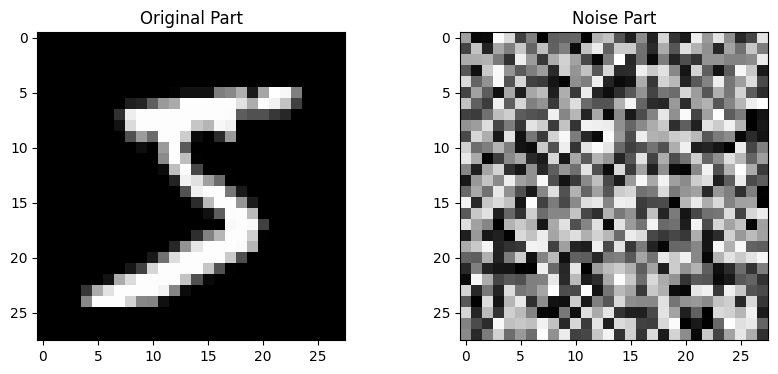

In [34]:
# Extract the noisy image
noisy_image = train_images_with_noise_channels[0]

# First 784 are original
original_part = noisy_image[:784].reshape(28, 28)

# Next 784 are noise
noise_part = noisy_image[784:].reshape(28, 28)

# Plot side by side
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1) # nrows, ncols, index
plt.imshow(original_part, cmap='gray')
plt.title('Original Part')

plt.subplot(1, 2, 2)
plt.imshow(noise_part, cmap='gray')
plt.title('Noise Part')

plt.show()


In [35]:
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis = 1)

In [36]:
train_images_with_zeros_channels.shape

(60000, 1568)

Text(0.5, 1.0, 'Zeros part')

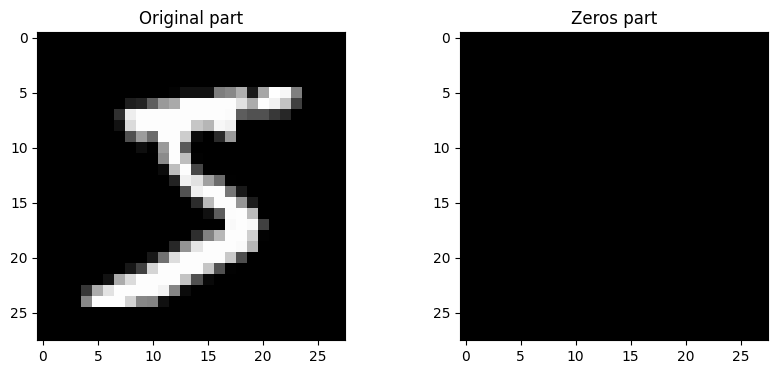

In [37]:
zeros_channel_image = train_images_with_zeros_channels[0]

plt.figure(figsize=(10, 4))

original_part = zeros_channel_image[:784].reshape((28,28))

zeros_part = zeros_channel_image[784:].reshape((28,28))

plt.subplot(1,2,1)
plt.imshow(original_part, cmap = 'gray')
plt.title('Original part')


plt.subplot(1,2,2)
plt.imshow(zeros_part, cmap = 'gray')
plt.title('Zeros part')


In [41]:
def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation= "relu"),
      layers.Dense(10, activation = "softmax")
  ])

  model.compile(
      optimizer = "rmsprop",
      loss = "sparse_categorical_crossentropy",
      metrics = ["accuracy"]
  )

  return model

In [42]:
model = get_model()

In [43]:
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6961 - loss: 1.0802 - val_accuracy: 0.9237 - val_loss: 0.2698
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9142 - loss: 0.2782 - val_accuracy: 0.9348 - val_loss: 0.2085
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9434 - loss: 0.1825 - val_accuracy: 0.9571 - val_loss: 0.1468
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9621 - loss: 0.1231 - val_accuracy: 0.9631 - val_loss: 0.1272
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9724 - loss: 0.0868 - val_accuracy: 0.9616 - val_loss: 0.1309
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9786 - loss: 0.0674 - val_accuracy: 0.9647 - val_loss: 0.1264
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9851 - loss: 0.0472 - val_accuracy: 0.9592 - val_loss: 0.1518
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0350 - val_accuracy: 0.

In [44]:
model = get_model()

In [45]:
history_zeros = model.fit(train_images_with_zeros_channels,  train_labels, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8544 - loss: 0.4925 - val_accuracy: 0.9578 - val_loss: 0.1502
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9605 - loss: 0.1339 - val_accuracy: 0.9652 - val_loss: 0.1131
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0820 - val_accuracy: 0.9700 - val_loss: 0.0988
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9832 - loss: 0.0591 - val_accuracy: 0.9753 - val_loss: 0.0830
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0450 - val_accuracy: 0.9754 - val_loss: 0.0824
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9909 - loss: 0.0318 - val_accuracy: 0.9751 - val_loss: 0.0897
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9938 - loss: 0.0237 - val_accuracy: 0.9787 - val_loss: 0.0761
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9952 - loss: 0.0192 - val_accuracy: 0.

In [46]:
# Plotting a validation accuracy comparison

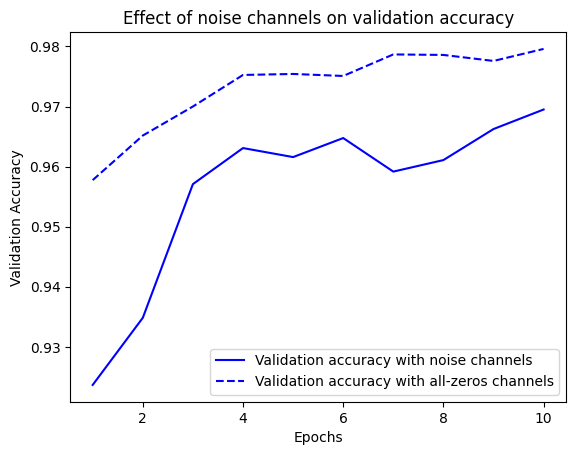

In [47]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

epochs = range(1,11)

plt.plot(epochs, val_acc_noise, "b-", label = "Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label = "Validation accuracy with all-zeros channels")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Effect of noise channels on validation accuracy")
plt.show()

In [ ]:
# The more noise channels added, the further accuracy will degrade
# Noise features lead to overfitting